<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/project_final/Project/Final/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MoneyBall: Predict Number of Runs Scored via Neural Networks

##Evaluate Dataset

In [1]:
!wget -O Baseball.csv https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True

--2020-12-13 22:41:05--  https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv [following]
--2020-12-13 22:41:06--  https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv [following]
--2020-12-13 22:41:06--  https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 20

In [2]:
import pandas as pd
data = pd.read_csv('Baseball.csv')
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
##Get the features of interest
features = [ 'RS', 'RA' ]
output = [ 'W' ]

work_data = data[ features + output ]

In [4]:
work_data = work_data.to_numpy()
X = work_data[:, :-1]
Y = work_data[:, -1]

Compare the Actual Wins with the Pythagorean Win Percentage

In [5]:
##Pythagorean win percentage is given by
## W = RS^2/(RS^2 + RA^2) * 162
## W = 162/(1 + (RA/RS)^2 )
pyth_wins = 162//(1 + (X[:,features.index('RA')]/X[:,features.index('RS')])**2)

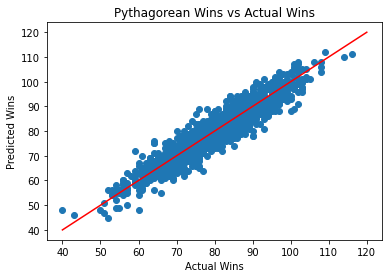

In [6]:
import matplotlib.pyplot as plt

##Plot the actual wins those predicted by the pythagorean wins
plt.scatter(Y, pyth_wins)
plt.plot([40, 120], [40, 120], color='red')
plt.ylabel('Predicted Wins')
plt.xlabel('Actual Wins')
plt.title('Pythagorean Wins vs Actual Wins')
plt.savefig('pythagorean_wins.png')
plt.show()

Runs Scored Analysis

In [7]:
##Get the features and ouput of interest
features = [ 'OBP', 'SLG', 'BA' ]
output = ['RS']

run_data = data[ features + output ]
run_data.head()

,OBP,SLG,BA,RS
0,0.328,0.418,0.259,734
1,0.320,0.389,0.247,700
2,0.311,0.417,0.247,712
3,0.315,0.415,0.260,734
4,0.302,0.378,0.240,613


In [8]:
run_data[features].describe().T.to_csv('off_stats.csv')
run_data[features].describe().T

,count,mean,std,min,25%,50%,75%,max
OBP,1232.0,0.326331,0.015013,0.277,0.317,0.326,0.337,0.373
SLG,1232.0,0.397342,0.033267,0.301,0.375,0.396,0.421,0.491
BA,1232.0,0.259273,0.012907,0.214,0.251,0.260,0.268,0.294


In [9]:
run_data[output].describe().T.to_csv('runs_scored.csv')
run_data[output].describe().T

,count,mean,std,min,25%,50%,75%,max
RS,1232.0,715.081981,91.534294,463.0,652.0,711.0,775.0,1009.0


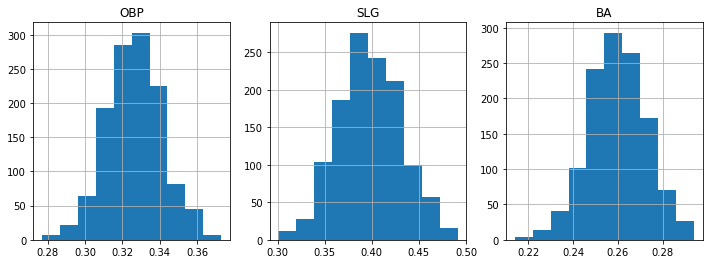

In [10]:
import matplotlib.pyplot as plt

x_dim = len(features)
fig, axes = plt.subplots( nrows = 1, ncols = x_dim, figsize = (x_dim * 4,4) )

for i in range(x_dim):
  plt.subplot(1, x_dim, i + 1)
  axes[i] = run_data[ features[i] ].hist()
  axes[i].set_title( features[i] )

plt.savefig('x_features_hist.png')

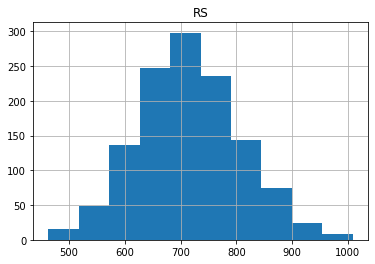

In [11]:
import matplotlib.pyplot as plt

run_data[output].hist()

plt.savefig('runs_scored_hist.png')
plt.show()

Evaluate HeatMap to Identify Correlations

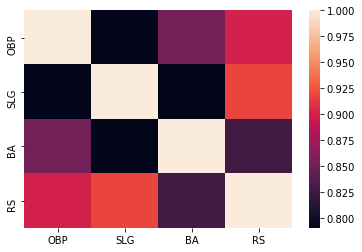

In [12]:
import seaborn as sns
correlation = run_data.corr()
svm = sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

figure = svm.get_figure()
figure.savefig('svm_conf.png')

##Set the Development Set: Training and Validation

Split the Data According to Years

In [13]:
##Get the Features of interest
features = ['OBP', 'SLG', 'BA']
output = ['RS']

In [14]:
import numpy as np

years = data['Year'].unique()
val_years = np.random.choice( years, int(0.25 * len(years)), replace=False )
print(val_years)

[1986, 1991, 2004, 1971, 2006, 1977, 2010, 1996, 1974, 1976, 1975]


In [15]:
##Establish the Training Set and the Validation Sets

TRAIN = pd.DataFrame()
VALID = pd.DataFrame()

for y in years:
  elem = data[ data['Year'] == y][features + output]
  if y in val_years:
    VALID = pd.concat( [VALID, elem] )
  else:
    TRAIN = pd.concat( [TRAIN, elem] )

##Training Set
TRAIN = TRAIN.to_numpy()

##Validation Set
VALID = VALID.to_numpy()

In [16]:
##Set Copies of numpy arrays
XTRAIN = np.array( TRAIN[:, :-1] )
YTRAIN = TRAIN[:, -1]

XVALID = np.array( VALID[:, :-1] )
YVALID = VALID[:, -1]

In [17]:
##Adjust the Training Data
mean = XTRAIN.mean(axis = 0)
std = XTRAIN.std(axis = 0)
XTRAIN -= mean
XTRAIN /= std

##Adjust the Validation Data
XVALID -= mean
XVALID /= std

##Define Utilities

Define Evaluation Utilities

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics

class PlotUtil:
  @staticmethod
  def get_learning_curve(history):
    f, ax = plt.subplots()
    ax.plot(history.history['loss'], '-', label = 'Training', color = 'blue')
    ax.plot(history.history['val_loss'], '--', label = 'Validation', color = 'orange')
    ax.set_ylabel('Loss')
    ax.set_xlabel('epoch')
    ax.set_yscale('log')
    ax.legend()
    return (f, ax)

class RegEvalUtil:
  @staticmethod
  def get_eval_metrics(y_true, y_pred):
    return { 'mse': metrics.mean_squared_error(y_true, y_pred),
            'mae': metrics.mean_absolute_error(y_true, y_pred) }

Define Model Utilities

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

class ModelUtil:
  @staticmethod
  def get_model(input):
    model = Sequential()
    model.add( Dense(18, input_dim = input, activation='relu'))
    model.add( Dense(6, activation = 'relu' ))
    model.add( Dense(3, activation = 'relu'))
    model.add( Dense(1, activation = 'linear' ))
    return model
  @staticmethod
  def get_callbacks(model_path):
    return [ ModelCheckpoint(filepath = model_path, 
                        monitor='val_loss', save_best_only = True, 
                        save_weights_only = True, verbose = 0), 
             EarlyStopping(monitor='val_loss', mode='min', 
                           patience=64, verbose=0) ]

DEFAULT_EPOCHS = 512
DEFAULT_BATCH = int(32 * 1.5)

##Candidate Models vs Linear Regression Model

Define the Neural Network Candidate 1

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 18)                72        
_________________________________________________________________
dense_52 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_53 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 4         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


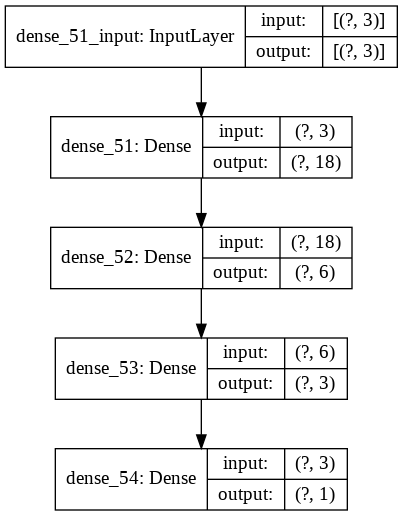

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

runs_nn_1 = Sequential()
runs_nn_1.add( Dense(18, input_dim = len(features), activation = 'relu'))
runs_nn_1.add( Dense(6, activation='relu'))
runs_nn_1.add( Dense(3, activation = 'relu' ))
runs_nn_1.add( Dense(1, activation = 'linear' ))

runs_nn_1.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
runs_nn_1.summary()
plot_model(runs_nn_1, to_file='runs_nn_1.png', show_shapes=True)

In [76]:
##Train the Model
history_nn_1 = runs_nn_1.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = DEFAULT_EPOCHS,
                      verbose = 0)

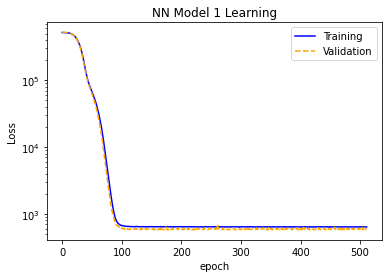

In [77]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_nn_1)
figs[1].set_title('NN Model 1 Learning')
plt.savefig('nn_1_learn_curve.png')
figs[0].show()

In [78]:
##Get the Predictions on Training and Validation
train_pred = runs_nn_1.predict(XTRAIN)
valid_pred = runs_nn_1.predict(XVALID)

nn_metrics_1 = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
              'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})
nn_metrics_1.to_csv('nn_1_metrics.csv')
nn_metrics_1.T.head()

,mse,mae
train,634.176062,19.942824
valid,578.203181,19.378587


Define the Neural Network Candidate 2



Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 18)                72        
_________________________________________________________________
dense_56 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 10        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


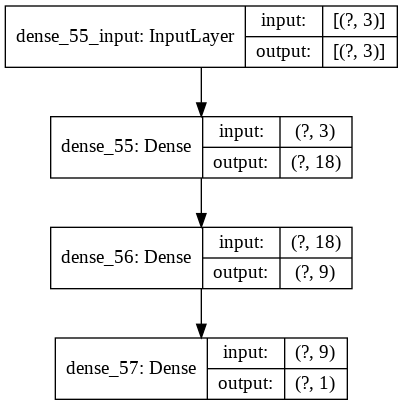

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

runs_nn_2 = Sequential()
runs_nn_2.add( Dense(18, input_dim = len(features), activation = 'relu'))
runs_nn_2.add( Dense(9, activation = 'relu' ))
runs_nn_2.add( Dense(1, activation = 'linear' ))

runs_nn_2.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
runs_nn_2.summary()
plot_model(runs_nn_2, to_file='runs_nn_2.png', show_shapes=True)

In [80]:
##Train the Model
history_nn_2 = runs_nn_2.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = DEFAULT_EPOCHS,
                      verbose = 0)

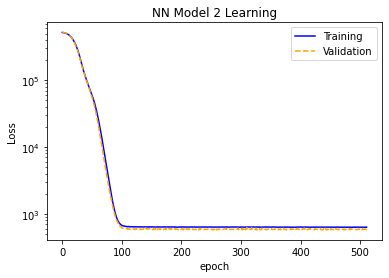

In [81]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_nn_2)
figs[1].set_title('NN Model 2 Learning')
plt.savefig('nn_2_learn_curve.png')
figs[0].show()

In [82]:
##Get the Predictions on Training and Validation
train_pred = runs_nn_2.predict(XTRAIN)
valid_pred = runs_nn_2.predict(XVALID)

nn_metrics_2 = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
              'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})
nn_metrics_2.to_csv('nn_2_metrics.csv')
nn_metrics_2.T.head()

,mse,mae
train,629.532095,19.808942
valid,592.288382,19.615881


Define Neural Network Candidate 3

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 36)                144       
_________________________________________________________________
dense_59 (Dense)             (None, 12)                444       
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 13        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


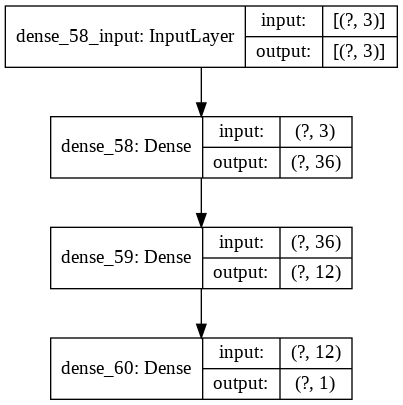

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

runs_nn_3 = Sequential()
runs_nn_3.add( Dense(36, input_dim = len(features), activation = 'relu'))
runs_nn_3.add( Dense(12, activation = 'relu' ))
runs_nn_3.add( Dense(1, activation = 'linear' ))

runs_nn_3.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
runs_nn_3.summary()
plot_model(runs_nn_3, to_file='runs_nn_3.png', show_shapes=True)

In [84]:
##Train the Model
history_nn_3 = runs_nn_3.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = DEFAULT_EPOCHS,
                      verbose = 0)

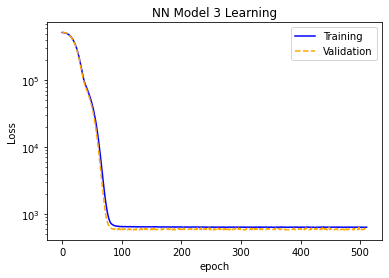

In [85]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_nn_3)
figs[1].set_title('NN Model 3 Learning')
plt.savefig('nn_3_learn_curve.png')
figs[0].show()

In [86]:
##Get the Predictions on Training and Validation
train_pred = runs_nn_3.predict(XTRAIN)
valid_pred = runs_nn_3.predict(XVALID)

nn_metrics_3 = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
              'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})
nn_metrics_3.to_csv('nn_3_metrics.csv')
nn_metrics_3.T.head()

,mse,mae
train,629.670412,19.982903
valid,589.403837,19.726825


Define Neural Network Candidate 4

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 18)                72        
_________________________________________________________________
dense_62 (Dense)             (None, 12)                228       
_________________________________________________________________
dense_63 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 7         
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


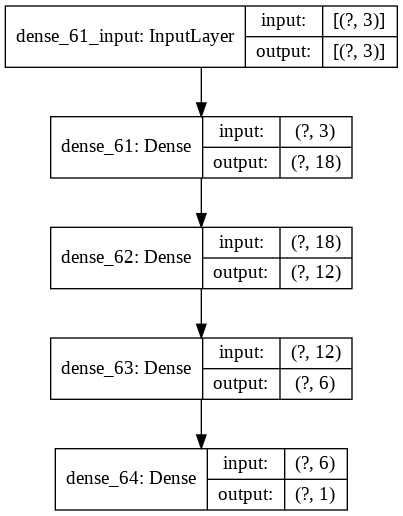

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

runs_nn_4 = Sequential()
runs_nn_4.add( Dense(18, input_dim = len(features), activation = 'relu'))
runs_nn_4.add( Dense(12, activation='relu'))
runs_nn_4.add( Dense(6, activation = 'relu' ))
runs_nn_4.add( Dense(1, activation = 'linear' ))

runs_nn_4.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
runs_nn_4.summary()
plot_model(runs_nn_4, to_file='runs_nn_4.png', show_shapes=True)

In [88]:
##Train the Model
history_nn_4 = runs_nn_4.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = DEFAULT_EPOCHS,
                      verbose = 0)

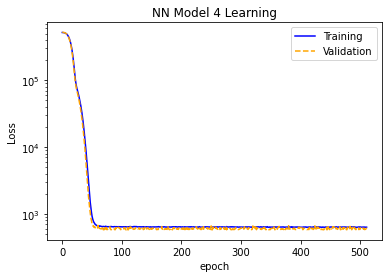

In [89]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_nn_4)
figs[1].set_title('NN Model 4 Learning')
plt.savefig('nn_4_learn_curve.png')
figs[0].show()

In [90]:
##Get the Predictions on Training and Validation
train_pred = runs_nn_4.predict(XTRAIN)
valid_pred = runs_nn_4.predict(XVALID)

nn_metrics_4 = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
              'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})
nn_metrics_4.to_csv('nn_4_metrics.csv')
nn_metrics_4.T.head()

,mse,mae
train,658.841826,20.497088
valid,621.380304,20.405467


Define Neural Network Candidate 5

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 24)                96        
_________________________________________________________________
dense_66 (Dense)             (None, 18)                450       
_________________________________________________________________
dense_67 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_68 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 4         
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


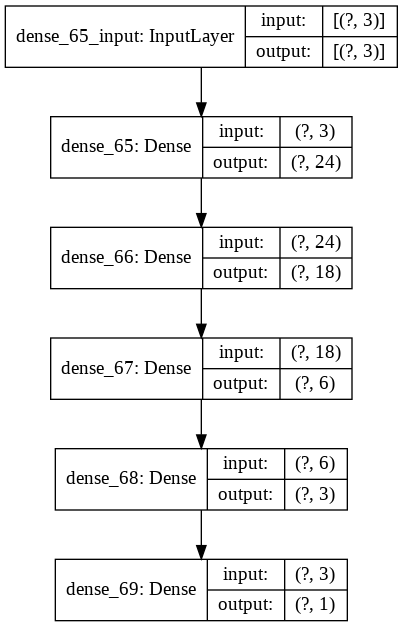

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

runs_nn_5 = Sequential()
runs_nn_5.add( Dense(24, input_dim = len(features), activation = 'relu'))
runs_nn_5.add( Dense(18, activation = 'relu'))
runs_nn_5.add( Dense(6, activation='relu'))
runs_nn_5.add( Dense(3, activation = 'relu' ))
runs_nn_5.add( Dense(1, activation = 'linear' ))

runs_nn_5.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
runs_nn_5.summary()
plot_model(runs_nn_5, to_file='runs_nn_5.png', show_shapes=True)

In [92]:
##Train the Model
history_nn_5 = runs_nn_5.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = 2 * DEFAULT_EPOCHS,
                      verbose = 0)

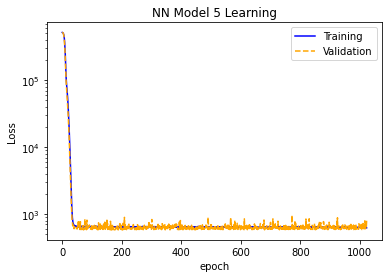

In [93]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_nn_5)
figs[1].set_title('NN Model 5 Learning')
plt.savefig('nn_5_learn_curve.png')
figs[0].show()

In [94]:
##Get the Predictions on Training and Validation
train_pred = runs_nn_5.predict(XTRAIN)
valid_pred = runs_nn_5.predict(XVALID)

nn_metrics_5 = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
              'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})
nn_metrics_5.to_csv('nn_5_metrics.csv')
nn_metrics_5.T.head()

,mse,mae
train,812.190256,22.307433
valid,810.396096,22.287463


Define the Linear Regression Model

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


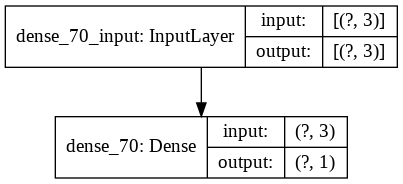

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

lin = Sequential()
lin.add( Dense(1, input_dim = len(features), activation = 'linear'))
lin.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
lin.summary()
plot_model(lin, to_file='lin.png', show_shapes=True)

In [96]:
##Train the Model
history_lin = lin.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = DEFAULT_EPOCHS,
                      verbose = 0)

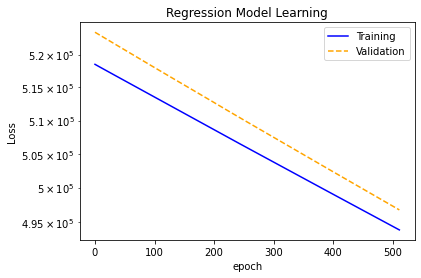

In [97]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_lin)
figs[1].set_title('Regression Model Learning')
plt.savefig('lin_learn_curve.png')
figs[0].show()

In [98]:
##Get the Predictions on Training and Validation
train_pred = lin.predict(XTRAIN)
valid_pred = lin.predict(XVALID)

lin_metrics = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
               'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})

lin_metrics.T.to_csv('nn_vs_lin.csv')
lin_metrics.T.head()

,mse,mae
train,493790.260239,698.981297
valid,496736.409061,700.851192


##Performance if Incorrect Activation Utilized by Regression Model

Set Last Layer to Have Sigmoid

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 18)                72        
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 4         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


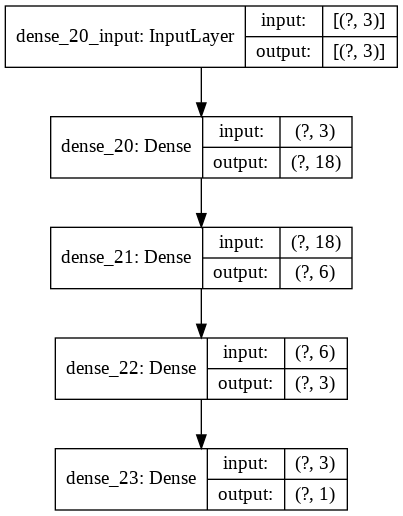

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

runs_nn_last_sig = Sequential()
runs_nn_last_sig.add( Dense(18, input_dim = len(features), activation = 'relu'))
runs_nn_last_sig.add( Dense(6, activation='relu'))
runs_nn_last_sig.add( Dense(3, activation = 'relu' ))
runs_nn_last_sig.add( Dense(1, activation = 'sigmoid' ))

runs_nn_last_sig.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
runs_nn_last_sig.summary()
plot_model(runs_nn_last_sig, to_file='runs_nn_last_sig.png', show_shapes=True)

In [45]:
##Train the Model
history_nn_last_sig = runs_nn_last_sig.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = DEFAULT_EPOCHS,
                      verbose = 0)

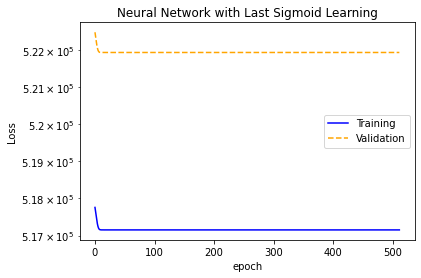

In [46]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_nn_last_sig)
figs[1].set_title('Neural Network with Last Sigmoid Learning')
plt.savefig('last_sig_learn_curve.png')
figs[0].show()

In [47]:
##Compare the results of the incorrect vs the correct last activation
train_pred = runs_nn_last_sig.predict(XTRAIN)
valid_pred = runs_nn_last_sig.predict(XVALID)

last_sig_metrics = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
               'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})

last_sig_metrics.T.to_csv('last_sig.csv')
last_sig_metrics.T.head()

,mse,mae
train,517150.210638,713.346809
valid,521937.250000,716.448630


Set All Layers to Sigmoid Activations

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 18)                72        
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 4         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


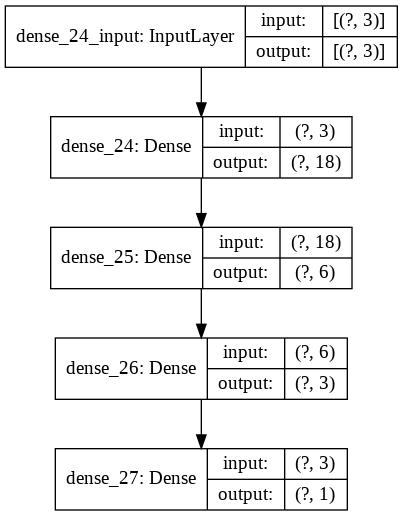

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

runs_nn_all_sig = Sequential()
runs_nn_all_sig.add( Dense(18, input_dim = len(features), activation = 'sigmoid'))
runs_nn_all_sig.add( Dense(6, activation='sigmoid'))
runs_nn_all_sig.add( Dense(3, activation = 'sigmoid' ))
runs_nn_all_sig.add( Dense(1, activation = 'sigmoid' ))

runs_nn_all_sig.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
runs_nn_all_sig.summary()
plot_model(runs_nn_all_sig, to_file='runs_nn_all_sig.png', show_shapes=True)

In [49]:
##Train the Model
history_nn_all_sig = runs_nn_all_sig.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = DEFAULT_EPOCHS,
                      verbose = 0)

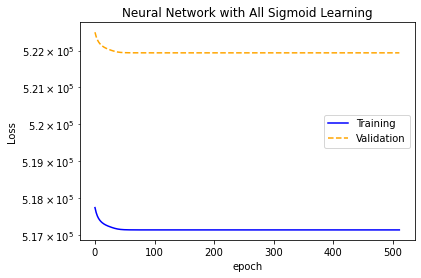

In [50]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_nn_all_sig)
figs[1].set_title('Neural Network with All Sigmoid Learning')
plt.savefig('all_sig_learn_curve.png')
figs[0].show()

In [51]:
##Compare the results of the sigmoid on regression model
train_pred = runs_nn_all_sig.predict(XTRAIN)
valid_pred = runs_nn_all_sig.predict(XVALID)

all_sig_metrics = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
               'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})

all_sig_metrics.T.to_csv('all_sig.csv')
all_sig_metrics.T.head()

,mse,mae
train,517150.210638,713.346809
valid,521937.250000,716.448630


##Overfitting Model

Define the Overfitting Network

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

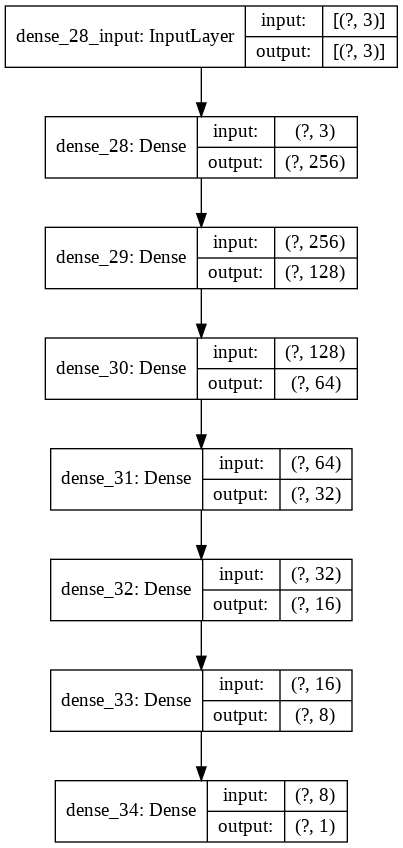

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

overfit = Sequential()
overfit.add( Dense(256, input_dim = len(features), activation = 'relu'))
overfit.add( Dense(128, activation = 'relu'))
overfit.add( Dense(64, activation= 'relu'))
overfit.add( Dense(32, activation = 'relu'))
overfit.add( Dense(16, activation = 'relu'))
overfit.add( Dense(8, activation = 'relu'))
overfit.add( Dense(1, activation = 'linear'))

overfit.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
overfit.summary()
plot_model(overfit, to_file='overfit.png', show_shapes=True)

In [53]:
##Train the Model
history_overfit = overfit.fit( XTRAIN, YTRAIN,
                      validation_data = (XVALID, YVALID),
                      epochs = 8 * DEFAULT_EPOCHS,
                      verbose = 0)

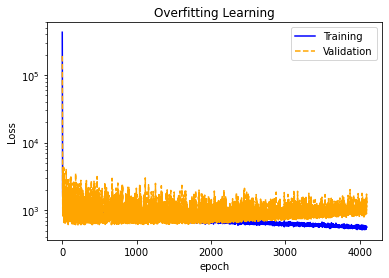

In [54]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_overfit)
figs[1].set_title('Overfitting Learning')
plt.savefig('overfit_learn_curve.png')
figs[0].show()

In [55]:
##Get the Predictions on Training and Validation
train_pred = overfit.predict(XTRAIN)
valid_pred = overfit.predict(XVALID)

overfit_metrics = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
               'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)})

overfit_metrics.head().T.to_csv('overfit.csv')
overfit_metrics.head().T.head()

,mse,mae
train,720.404481,21.780243
valid,1096.954592,26.650884


##Overfitting Model: Output as Input Feature

Set the Training And Validation Data to have the Output as an Input Feature

In [41]:
##Create copies of the Training Set
XTRAIN_INPUT = np.array(TRAIN[:, :])
YTRAIN_INPUT = np.array(TRAIN[:, -1])

##Create copies of the Validation Set
XVALID_INPUT = np.array(VALID[:, :])
YVALID_INPUT = np.array(VALID[:, -1])

In [42]:
##Adjust the Training Data
mean = XTRAIN_INPUT.mean(axis = 0)
std = XTRAIN_INPUT.std(axis = 0)
XTRAIN_INPUT -= mean
XTRAIN_INPUT /= std

##Adjust the Validation Data
XVALID_INPUT -= mean
XVALID_INPUT /= std

Define the Overfitting Model with Output as Feature

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 162)               810       
_________________________________________________________________
dense_21 (Dense)             (None, 81)                13203     
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 738       
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 30        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 4         
Total params: 14,785
Trainable params: 14,785
Non-trainable params: 0
_________________________________________________________________


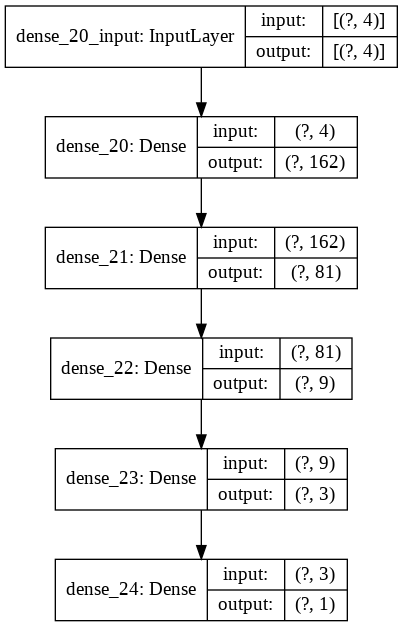

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.utils import plot_model

overfit_input = Sequential()
overfit_input.add( Dense(162, input_dim = len( XTRAIN_INPUT[0,:] ), activation = 'relu'))
overfit_input.add( Dense(81, activation = 'relu'))
overfit_input.add( Dense(9, activation = 'relu'))
overfit_input.add( Dense(3, activation = 'relu'))
overfit_input.add( Dense(1, activation = 'linear' ))

overfit_input.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'] )
overfit_input.summary()
plot_model(overfit_input, to_file='overfit_input.png', show_shapes=True)

In [44]:
##Train the Model
history_overfit_input = overfit_input.fit( XTRAIN_INPUT, YTRAIN_INPUT,
                      validation_data = (XVALID_INPUT, YVALID_INPUT),
                      epochs = 5 * DEFAULT_EPOCHS,
                      batch_size = int( 0.5 * len(XTRAIN)),
                      verbose = 0)

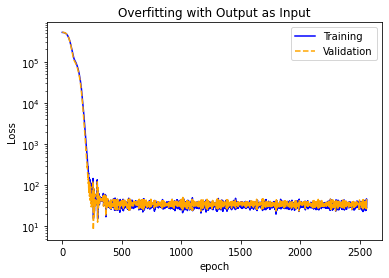

In [45]:
##View the Learning Curves
figs = PlotUtil.get_learning_curve(history_overfit_input)
figs[1].set_title('Overfitting with Output as Input')
plt.savefig('overfit_input_learn_curve.png')
figs[0].show()

In [46]:
##Get the Predictions on Training and Validation
train_pred = overfit_input.predict(XTRAIN_INPUT)
valid_pred = overfit_input.predict(XVALID_INPUT)

overfit_input_metrics = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN_INPUT, train_pred),
               'valid': RegEvalUtil.get_eval_metrics(YVALID_INPUT, valid_pred)})

overfit_input_metrics.T.to_csv('overfit_input.csv')
overfit_input_metrics.T.head()

,mse,mae
train,25.221306,4.303230
valid,26.150499,4.366033


##Function to Simulate Neural Network Prediction

In [62]:
import numpy as np

class ModelSim:
  def __init__(self, model):
    self.w = []
    self.b = []
    for lay in model.layers:
      params = np.array(lay.get_weights())
      self.w.append(params[0])
      self.b.append(params[1])
  ##TODO: Update to determine shape of tensor
  def get_prediction(self, x):
    t = np.array(x)
    for i in range(len(self.w)):
      ##Broadcast and take dot product before adding bias
      t = (self.w[i] * t.reshape( len(t), 1 )).sum(axis = 0) + self.b[i]
    return t

In [63]:
model = runs_nn_1
model_sim = ModelSim(model)

##Get the predictions for the Training Set
n_train = len(XTRAIN)
sim_train_pred = np.zeros(shape=(n_train, 1))
for i in range(n_train):
  sim_train_pred[i] = model_sim.get_prediction(XTRAIN[i])

##Get the predications for the Validation Set
n_valid = len(XVALID)
sim_valid_pred = np.zeros(shape=(n_valid, 1))
for i in range(n_valid):
  sim_valid_pred[i] = model_sim.get_prediction(XVALID[i])


Compare Metrics Between the Data and the Predictions

In [64]:
##Get the metrics by comparing those of the true data
sim_metrics_data = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(YTRAIN, sim_train_pred),
               'valid': RegEvalUtil.get_eval_metrics(YVALID, sim_valid_pred)})

sim_metrics_data.to_csv('sim_metrics_data.csv')
sim_metrics_data.T.head()

,mse,mae
train,1251.690264,28.604970
valid,1218.372543,27.705945


In [65]:
##Get the Predictions on Training and Validation
train_pred = model.predict(XTRAIN)
valid_pred = model.predict(XVALID)

sim_metrics_model = pd.DataFrame.from_dict({ 'train': RegEvalUtil.get_eval_metrics(train_pred, sim_train_pred),
              'valid': RegEvalUtil.get_eval_metrics(valid_pred, sim_valid_pred)})
sim_metrics_model.to_csv('sim_metrics_model.csv')
sim_metrics_model.T.head()

,mse,mae
train,598.551863,23.657519
valid,612.825501,23.852215


##Feature Significance

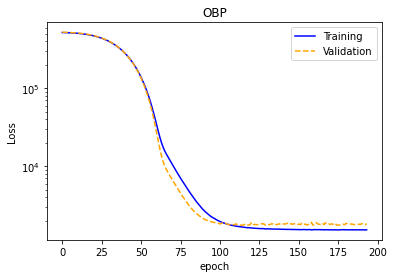

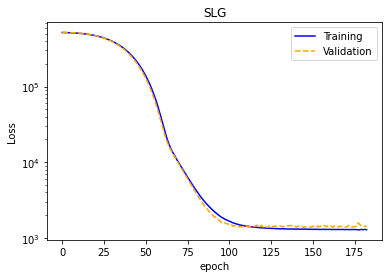

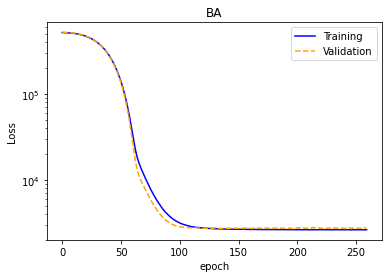

In [66]:
##Keep a dictionary to keep track of the loss
val_loss = {}

##Set the model with default weights
DEFAULT_WEIGHTS = 'default.hdf5'
model = ModelUtil.get_model(1)
model.save_weights(DEFAULT_WEIGHTS)

for i in range(len(features)):
  
  model.load_weights(DEFAULT_WEIGHTS)
  model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'])

  ##Define the model name
  model_path = features[i] + '.hdf5'
  model_callbacks = ModelUtil.get_callbacks(model_path)

  ##Train the model
  history = model.fit( XTRAIN[:,i], YTRAIN[:],
                      validation_data = (XVALID[:,i], YVALID[:]),
                      epochs = DEFAULT_EPOCHS,
                      batch_size = DEFAULT_BATCH,
                      callbacks = model_callbacks,
                      verbose = 0)
  
  ##View the Learning Curve for the model
  figs = PlotUtil.get_learning_curve(history)
  figs[1].set_title(features[i])
  plt.savefig(features[i] + '.png')
  figs[0].show()

  ##Get the predictions from the best weights from model checkpointing
  model.load_weights(model_path)
  train_pred = model.predict(XTRAIN[:, i])
  valid_pred = model.predict(XVALID[:, i])

  eval = { 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
              'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)}
  
  val_loss[features[i]] = eval['valid']['mae']


In [67]:
##Sort features by validation loss
ranked_loss = pd.DataFrame( {'feature': val_loss.keys(), 'loss': val_loss.values()}, columns=['feature', 'loss'])
ranked_loss = ranked_loss.sort_values(by = ['loss'])
ranked_loss.to_csv('Single_Feature_Loss.csv')
ranked_loss.head(len(ranked_loss))

,feature,loss
1,SLG,29.489473
0,OBP,33.140926
2,BA,40.601571


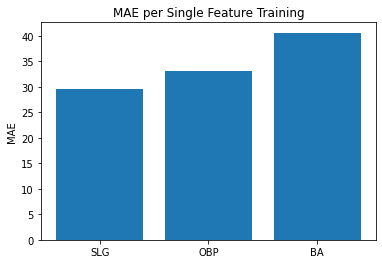

In [68]:
import matplotlib.pyplot as plt

plt.bar(ranked_loss['feature'], ranked_loss['loss'])
plt.ylabel('MAE')
plt.title('MAE per Single Feature Training')
plt.savefig('Single_Feature_Loss.png')
plt.show()

##Feature Reduction

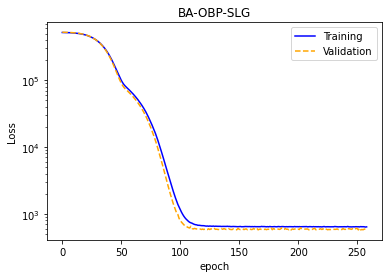

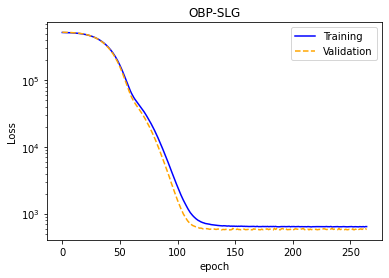

In [69]:
##Set the reduce features list to contain the indices for each features
feature_red = [ features.index(u) for u in ranked_loss['feature']]

##Keep a dictionary to keep track of the loss
val_loss_red = {}

##Train reduced model for features greater than one
while len(feature_red) > 1:

  ##Set the updated np array
  x_train_red = XTRAIN[:, feature_red]
  x_valid_red = XVALID[:, feature_red]
  
  model = ModelUtil.get_model(len(feature_red))
  model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse'])

  ##Set the indentifier
  key = '-'.join(sorted([features[i] for i in feature_red]))
  model_path = key + '.hdf5'
  model_callbacks = ModelUtil.get_callbacks(model_path)

  ##Train the model
  history = model.fit( x_train_red, YTRAIN[:],
                      validation_data = (x_valid_red, YVALID[:]),
                      epochs = DEFAULT_EPOCHS,
                      batch_size = DEFAULT_BATCH,
                      callbacks = model_callbacks,
                      verbose = 0)
  
  ##View the Learning Curve for the model
  figs = PlotUtil.get_learning_curve(history)
  figs[1].set_title(key)
  plt.savefig(key + '.png')
  figs[0].show()

  ##Get the predictions from the best weights from model checkpointing
  model.load_weights(model_path)
  train_pred = model.predict(x_train_red)
  valid_pred = model.predict(x_valid_red)

  eval = { 'train': RegEvalUtil.get_eval_metrics(YTRAIN, train_pred),
              'valid': RegEvalUtil.get_eval_metrics(YVALID, valid_pred)}
  
  val_loss_red[key] = eval['valid']['mae']

  ##Remove the least import feature
  feature_red.pop()


In [70]:
##Sort features by validation loss
ranked_loss_red = pd.DataFrame( {'feature': val_loss_red.keys(), 'loss': val_loss_red.values()}, columns=['feature', 'loss'])
ranked_loss_red.to_csv('Feature_Reduction_Loss.csv')
ranked_loss_red.head(len(ranked_loss_red))

,feature,loss
0,BA-OBP-SLG,19.369801
1,OBP-SLG,19.269836


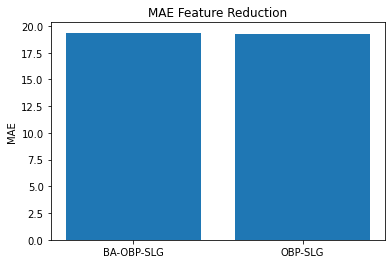

In [111]:
import matplotlib.pyplot as plt

plt.bar(ranked_loss_red['feature'], ranked_loss_red['loss'])
plt.ylabel('MAE')
plt.title('MAE Feature Reduction')
plt.savefig('Feature_Reduction_Loss.png')
plt.show()

##Collect Information for Report

In [47]:
##Create directory to contain all the desired contents
!if [[ ! -e proj_dir ]]; then mkdir proj_dir; fi

In [48]:
!mv *.csv proj_dir/
!mv *.png proj_dir/

In [49]:
!tar -cvf phase_final.tar proj_dir/

proj_dir/
proj_dir/overfit_input.png
proj_dir/overfit_input.csv
proj_dir/off_stats.csv
proj_dir/overfit_input_learn_curve.png
proj_dir/runs_scored.csv
proj_dir/runs_scored_hist.png
proj_dir/Baseball.csv
proj_dir/pythagorean_wins.png
proj_dir/svm_conf.png
proj_dir/x_features_hist.png
